# ライブラリのインストール

In [ ]:
!pip install anthropic

# google driveのマウント

In [ ]:
# prompt: create code to mount google drive

# # google driveのマウント
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Anthropic API key

In [ ]:
from google.colab import userdata
anthropic_key = userdata.get('anthropic')

# ライブラリの読み込み

In [ ]:
import os
from pathlib import Path
import numpy as np
import anthropic
from io import BytesIO
import re
import PIL
from PIL import Image
import base64
import matplotlib.pyplot as plt
import pandas as pd


# 変数設定

In [ ]:
datafolder = r'/content/drive/My Drive/82_DX_Quest/topologic_data' # csvが保存されているフォルダ
Rh_lim = 0.34 # グラフy軸の最大値表示範囲の余白

In [ ]:
datafolder = Path(datafolder)
os.chdir(datafolder)

# x軸, y軸のレンジを揃えたグラフの作成

## 関数定義

In [ ]:
def preprocess_csv(csv_file):
    # read Group, CAD_no, X, Y
    with open(csv_file, 'r', encoding='shift_jis') as fin:
        for i, line in enumerate(fin):
            if i==1:
                break
    terms = line.split(' ')
    CAD_no = int(terms[0][-1])
    X = int(terms[2].split(('='))[-1])
    Y = int(terms[1].split(('='))[-1])

    # read data, x, y max, min
    df = pd.read_csv(csv_file, skiprows=8, header=0, #names=['Vset', 'Vobs', 'Iobs', 'R'],
                     names=['H(Oe)', 'H//(Oe)', 'H⊥(Oe)', 'I(mA)', 'Vh(mV)', 'Rh(Ω)', 'dRh/dH(mΩ/Oe)'],
                     encoding='shift-jis')
    try:
        df['dRh/dH(mΩ/Oe)'] = df['dRh/dH(mΩ/Oe)'].astype(float)
    except:
#        df['dRh/dH(mΩ/Oe)'] = df['dRh/dH(mΩ/Oe)'].str.replace('-∞', '-inf').astype(float)
        df['dRh/dH(mΩ/Oe)'] = df['dRh/dH(mΩ/Oe)'].str.replace('-∞', '-1e+26').astype(float)
    H_max, H_min = df['H(Oe)'].max(), df['H(Oe)'].min()
    Rh_max, Rh_min = df['Rh(Ω)'].max(), df['Rh(Ω)'].min()
    dRh_dH_max, dRh_dH_min = df['dRh/dH(mΩ/Oe)'].max(), df['dRh/dH(mΩ/Oe)'].min()

    record = {'group':group, 'X':X, 'Y':Y, 'CAD_no':CAD_no, 'csv_file':csv_file,
              'H_max':H_max, 'H_min':H_min, 'Rh_max':Rh_max, 'Rh_min':Rh_min,
              'dRh_dH_max':dRh_dH_max, 'dRh_dH_min':dRh_dH_min}

    return record

In [ ]:
def make_graph(df_row, x_lim=None, y_lim=None):
    group = df_row.group
    X, Y = df_row.X, df_row.Y
    CAD_no = df_row.CAD_no
    csv_file = df_row.csv_file
    # グラフを作成
    img_file = csv_file.with_suffix('.png')
    img_file = img_file.parent / f'VLM_{img_file.name}'
    # データの読み込み
    df = pd.read_csv(csv_file, skiprows=8, header=0,
                     names=['H(Oe)', 'H//[mon](Oe)', 'H⊥[mon](Oe)',
                            'I(mA)', 'Vh(mV)', 'Rh(Ω)', 'dRh/dH(mΩ/Oe)'],
                     encoding='shift-jis')
    fig, ax1 = plt.subplots(figsize=(4, 4))
    # 第1軸にデータをプロット
    ax1.plot(df['H(Oe)']/1e3, df['Rh(Ω)'])
    if x_lim:
        ax1.set_xlim(-x_lim, x_lim)
    if y_lim:
        ax1.set_ylim(-y_lim, y_lim)
    plt.savefig(img_file)
    plt.close()

## x軸, y軸の最大値を設定

In [ ]:
csv_files = datafolder.glob('A*/*.csv')
csv_files = list(csv_files)

# データの前処理　座標等を取得
records = []
for csv_file in csv_files:
    group = csv_file.parent.stem
    record = preprocess_csv(csv_file)
    records.append(record)

df = pd.DataFrame(records)

In [ ]:
H_max = df['H_max'].max()
H_min = df['H_min'].min()
H_lim = max(abs(H_max), abs(H_min))  # Hの最大値の絶対値
# delta = 40
# Rh_max_percentile = np.percentile(df.Rh_max, 100-delta)
# Rh_min_percentile = np.percentile(df.Rh_min, delta)
# Rh_lim = max(abs(Rh_max_percentile), abs(Rh_min_percentile))  # 99%tileの絶対値の大きい方
print(f'H_max: {H_lim}, Rh_max: {Rh_lim}')

H_max: 8000, Rh_max: 0.34


## グラフ作成

In [ ]:
for df_row in df.itertuples():
    print(f'Processing {df_row.Index+1}/{len(df)}')
    # グラフプロット(png)
    make_graph(df_row, x_lim=H_lim*1.2/1e3,
                       y_lim=Rh_lim)

Processing 1/843
Processing 2/843
Processing 3/843
Processing 4/843
Processing 5/843
Processing 6/843
Processing 7/843
Processing 8/843
Processing 9/843
Processing 10/843
Processing 11/843
Processing 12/843
Processing 13/843
Processing 14/843
Processing 15/843
Processing 16/843
Processing 17/843
Processing 18/843
Processing 19/843
Processing 20/843
Processing 21/843
Processing 22/843
Processing 23/843
Processing 24/843
Processing 25/843
Processing 26/843
Processing 27/843
Processing 28/843
Processing 29/843
Processing 30/843
Processing 31/843
Processing 32/843
Processing 33/843
Processing 34/843
Processing 35/843
Processing 36/843
Processing 37/843
Processing 38/843
Processing 39/843
Processing 40/843
Processing 41/843
Processing 42/843
Processing 43/843
Processing 44/843
Processing 45/843
Processing 46/843
Processing 47/843
Processing 48/843
Processing 49/843
Processing 50/843
Processing 51/843
Processing 52/843
Processing 53/843
Processing 54/843
Processing 55/843
Processing 56/843
P

# VLMによるクラス分類

## 関数定義

In [ ]:
def image_to_base64(image_path):
    # 画像ファイルをバイナリモードで読み込む
    with open(image_path, "rb") as image_file:
        # 画像データを読み込む
        image_data = image_file.read()
        # base64エンコードする
        encoded_image_data = base64.b64encode(image_data)
        # エンコードされたデータを文字列に変換する
        base64_string = encoded_image_data.decode('utf-8')
    return base64_string

def base64_to_pil(base64_string):
    # base64デコードしてバイナリデータに戻す
    image_data = base64.b64decode(base64_string)
    # バイナリデータをBytesIOオブジェクトに変換
    image_data = BytesIO(image_data)
    # PIL形式で画像を読み込む
    image = Image.open(image_data)
    return image

In [ ]:
def ask_hysterisis_clarity(client, img_path):
    img_media_type = "image/png"
    img_base64 = image_to_base64(img_path)
    message = client.messages.create(
        model="claude-3-5-sonnet-20241022",
        max_tokens=32,
        messages=[
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": "_img:"
                    },
                    {
                        "type": "image",
                        "source": {
                            "type": "base64",
                            "media_type": img_media_type,
                            "data": img_base64,
                        },
                    },
                    {
                        "type": "text",
                        "text": "_imgのヒステリシスは明瞭ですか？次のdict形式で答えてください。\
                            {'clarity': 'yes or no'}"
                    }
                ]
            }
        ],
    )
    return message.content[0].text


In [ ]:
# 画像を順次ファイルから読み込んで、nxmに配置して表示する関数
def display_images_in_grid(df, n, m):
    fig, axes = plt.subplots(n, m, figsize=(15, 15))
    axes = axes.flatten()

    for ax, file_path in zip(axes, df['img_path']):
        img = Image.open(file_path)
        ax.imshow(img)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

## 分類対象の画像

In [ ]:
csv_files = datafolder.glob('A*/VLM*.png')
csv_files = list(csv_files)
df_to_classify = pd.DataFrame(csv_files, columns=['img_path'])
df_to_classify['label'] = None

In [ ]:
df_to_classify.head()

,img_path,label
0,/content/drive/My Drive/82_DX_Quest/topologic_...,None
1,/content/drive/My Drive/82_DX_Quest/topologic_...,None
2,/content/drive/My Drive/82_DX_Quest/topologic_...,None
3,/content/drive/My Drive/82_DX_Quest/topologic_...,None
4,/content/drive/My Drive/82_DX_Quest/topologic_...,None


## クラス分類方法の事前説明

In [ ]:
# 事前説明で使う画像の例
img_media_type = "image/png"
img_class1_example_0 = image_to_base64(df_to_classify['img_path'][130])
img_class1_example_1 = image_to_base64(df_to_classify['img_path'][240])
img_class0_example_0 = image_to_base64(df_to_classify['img_path'][111])
img_class0_example_1 = image_to_base64(df_to_classify['img_path'][9])

examples = [img_class1_example_0, img_class1_example_0, # ヒステリシスが明瞭な例
            img_class0_example_0, img_class0_example_1] # ヒステリシスが不明瞭な例


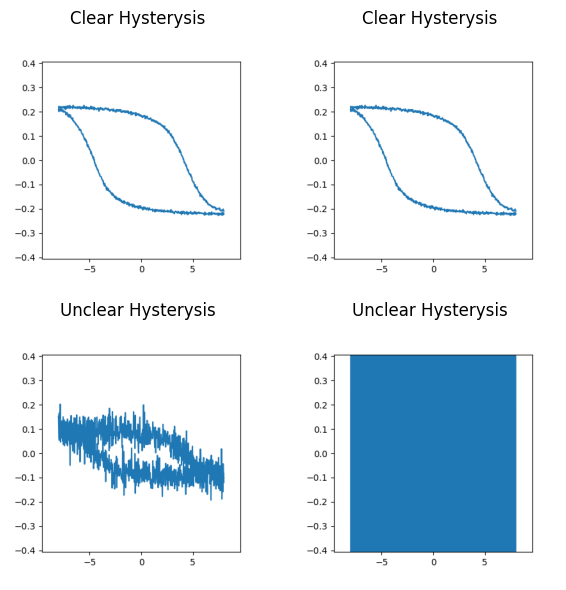

In [ ]:
# 事前説明用画像の表示
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
axes = axes.flatten()

for i, (ax, img_base64) in enumerate(zip(axes, examples)):
    img = base64_to_pil(img_base64)
    ax.imshow(img)
    ax.axis('off')
    if i < 2:
        ax.set_title('Clear Hysterysis')
    else:
        ax.set_title('Unclear Hysterysis')

plt.tight_layout()
plt.show()


In [ ]:
# 事前説明のコンテンツ作成
content = []
for i, img in enumerate(examples):
    content.append({
                    "type": "text",
                    "text": f"img{i}："
                    })
    content.append({
                    "type": "image",
                    "source": {
                        "type": "base64",
                        "media_type": img_media_type,
                        "data": img,
                    },
                })

content.append({
    "type": "text",
    "text": "画像中の青い線は抵抗のヒシテリシス特性を表しています。\
            2つのy軸との交点が互いに離れているほど、\
            また、2つのx軸との交点が互いに離れているほどヒステリシス内の面積が大きくなり、\
            良好な特性となります。\
            ヒステリシス内の面積の観点から、データを2つのクラスに分けて下さい。\
            必要に応じて隣接平均をとってノイズ除去を行なってから、\
            ヒステリシス内の面積を計算して下さい。\
            画像例を4つ送ります。\
            img0, img1はヒステリシス形状が明瞭で、ヒステリシス内の面積が大きいデータです。\
            img2, img3はヒステリシス形状が不明瞭で、ヒステリシス内の面積が小さいデータです。\
            このメッセージには答えず、次から送る画像に対して、ヒステリシスの明瞭さを回答してください。"
})


In [ ]:
# VLMと通信するクライアントを初期化
client = anthropic.Anthropic(api_key=anthropic_key)

In [ ]:
# 事前説明 メッセージ送信
message = client.messages.create(
    model="claude-3-5-sonnet-20241022",
    max_tokens=1,
    messages=[
        {
            "role": "user",
            "content": content
       }
    ],
)

## 画像分類実行

In [ ]:
pattern = r"\{'clarity': '[a-z]+'\}"
for i in range(len(df_to_classify)):
#for i in range(20):
    for j in range(3): #回答にdict形式が含まれない場合は３回までトライする。
        result = ask_hysterisis_clarity(client, df_to_classify['img_path'][i])
        match = re.match(pattern, result)
        if match:
            break
    print(f'Processing {i}/{len(df_to_classify)}')
    print(result)
    print('\n')
    if match:
        result_dict = eval(match.group())
    else:
        result_dict = {'clarity': 'no'}
    if result_dict['clarity'] == 'yes':
        df_to_classify.loc[i, 'label'] = 1
    else:
        df_to_classify.loc[i, 'label'] = 0

df_to_classify.to_csv('df_to_classify_result.csv', index=False)


ストリーミング出力は最後の 5000 行に切り捨てられました。
Processing 14/843
{'clarity': 'no'}

このグラフはヒステリシス曲線というよりも、時系列データま


Processing 15/843
{'clarity': 'no'}

このグラフにはヒステリシス（履歴現象）の特徴的


Processing 16/843
{'clarity': 'yes'}

このグラフには非常に明瞭なヒステリシス曲線が表


Processing 17/843
{'clarity': 'no'}

この画像はヒステリシス曲線ではなく、x軸方向に


Processing 18/843
{'clarity': 'no'}

この画像からはヒステリシスの特徴である閉じたループ形状


Processing 19/843
{'clarity': 'yes'}

このグラフは非常に明瞭なヒステリシスループを示しています


Processing 20/843
{'clarity': 'yes'}

この画像には明瞭なヒステリシスループが見られます。上向き


Processing 21/843
{'clarity': 'yes'}

このグラフは明瞭なヒステリシスループを示しています。以下


Processing 22/843
{'clarity': 'no'}

このグラフからはヒステリシスの特徴である「履歴現象」


Processing 23/843
{'clarity': 'yes'}

このグラフには明確なヒステリシスループが観察できます。データポイ


Processing 24/843
{'clarity': 'yes'}

このグラフは上向きと下向きのパスが明確に分離しており、


Processing 25/843
{'clarity': 'yes'}

このグラフはX軸の値が増加・減少する際に明確な経路


Processing 26/843
{'clarity': 'yes'}

このグラフは明確なヒステリシスループを示しています。上向きの


Processing 27/843
{'clarity': 'yes'}

このグラフは非常に明瞭なヒステリシスループを示しています


Processing 28/843
{'cla

In [ ]:
df_to_classify.head()

,img_path,label
0,/content/drive/My Drive/82_DX_Quest/topologic_...,1
1,/content/drive/My Drive/82_DX_Quest/topologic_...,1
2,/content/drive/My Drive/82_DX_Quest/topologic_...,0
3,/content/drive/My Drive/82_DX_Quest/topologic_...,1
4,/content/drive/My Drive/82_DX_Quest/topologic_...,0


# 分類結果の確認

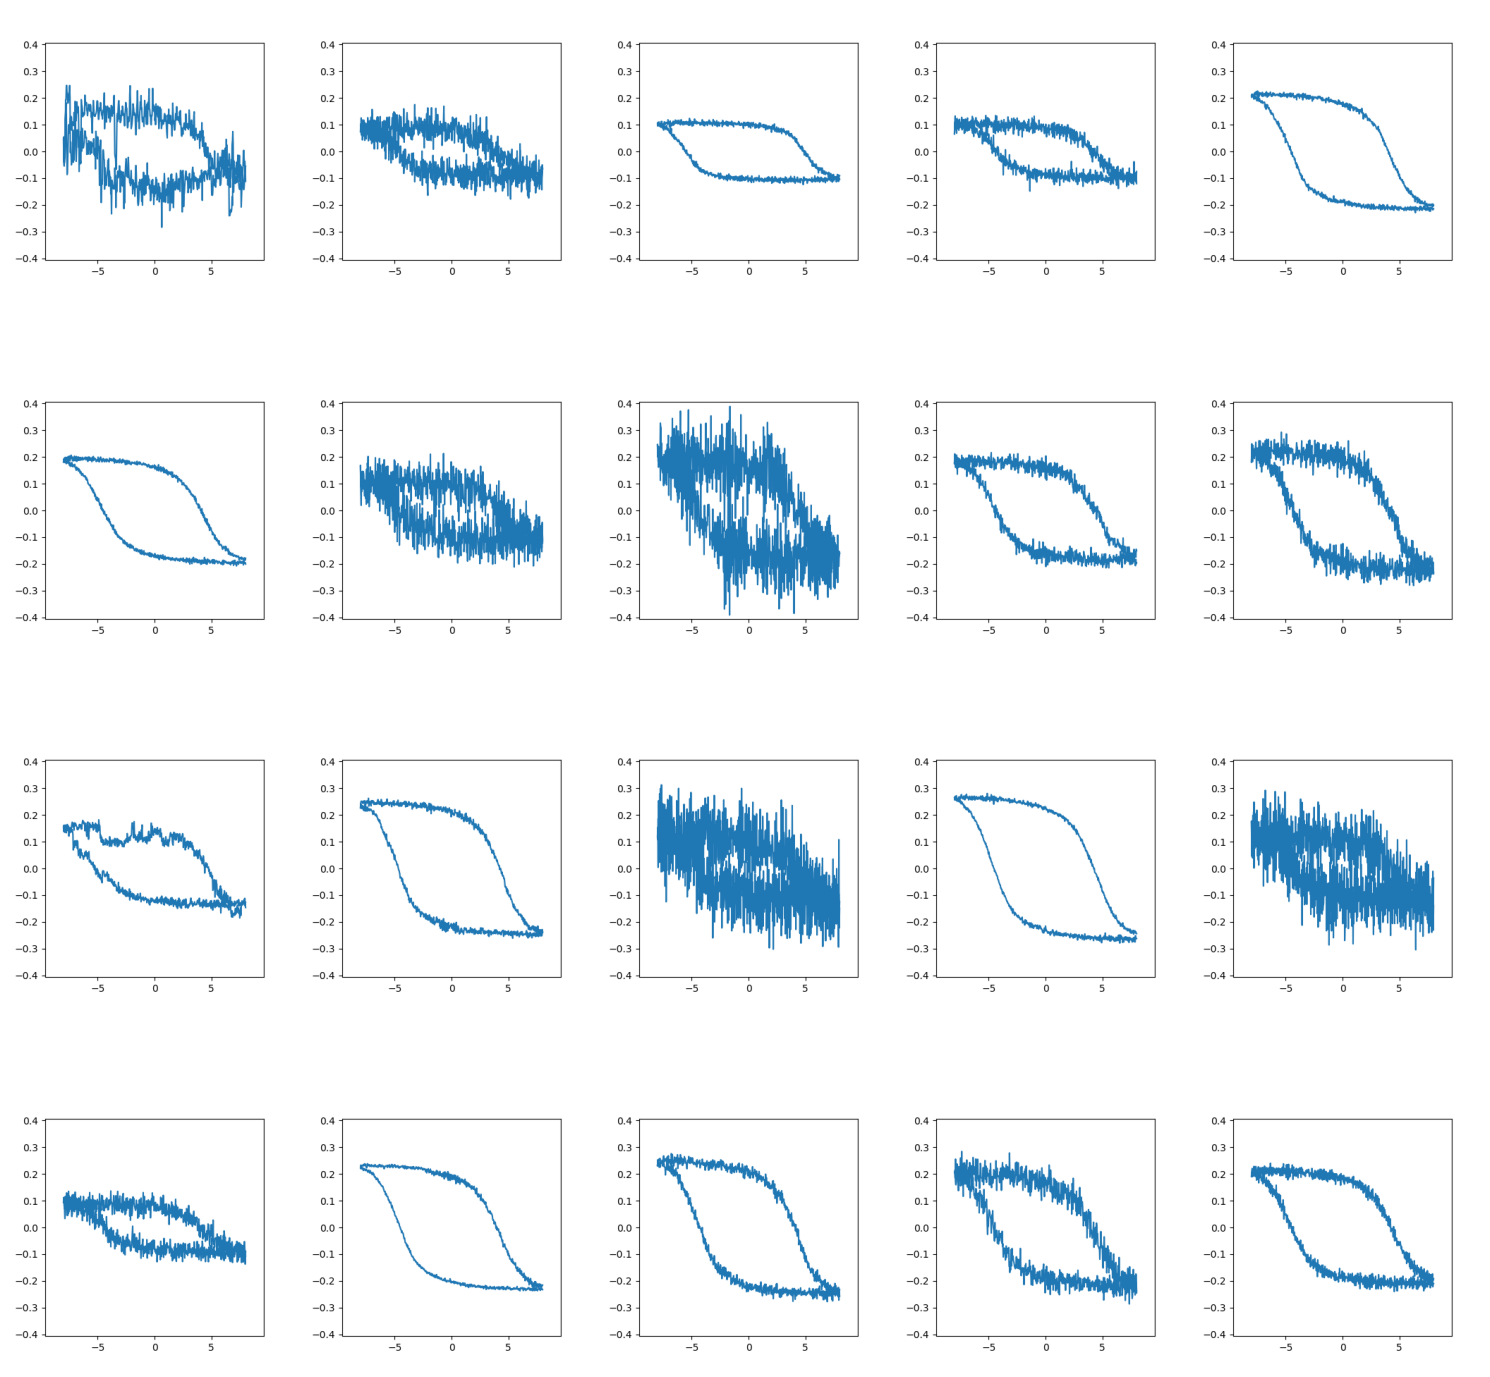

In [ ]:
# ランダムに20個のデータを取り出す
random_sample = df_to_classify.query('label == 1').sample(n=20)
display_images_in_grid(random_sample, 4, 5)  # 2行5列に配置して表示


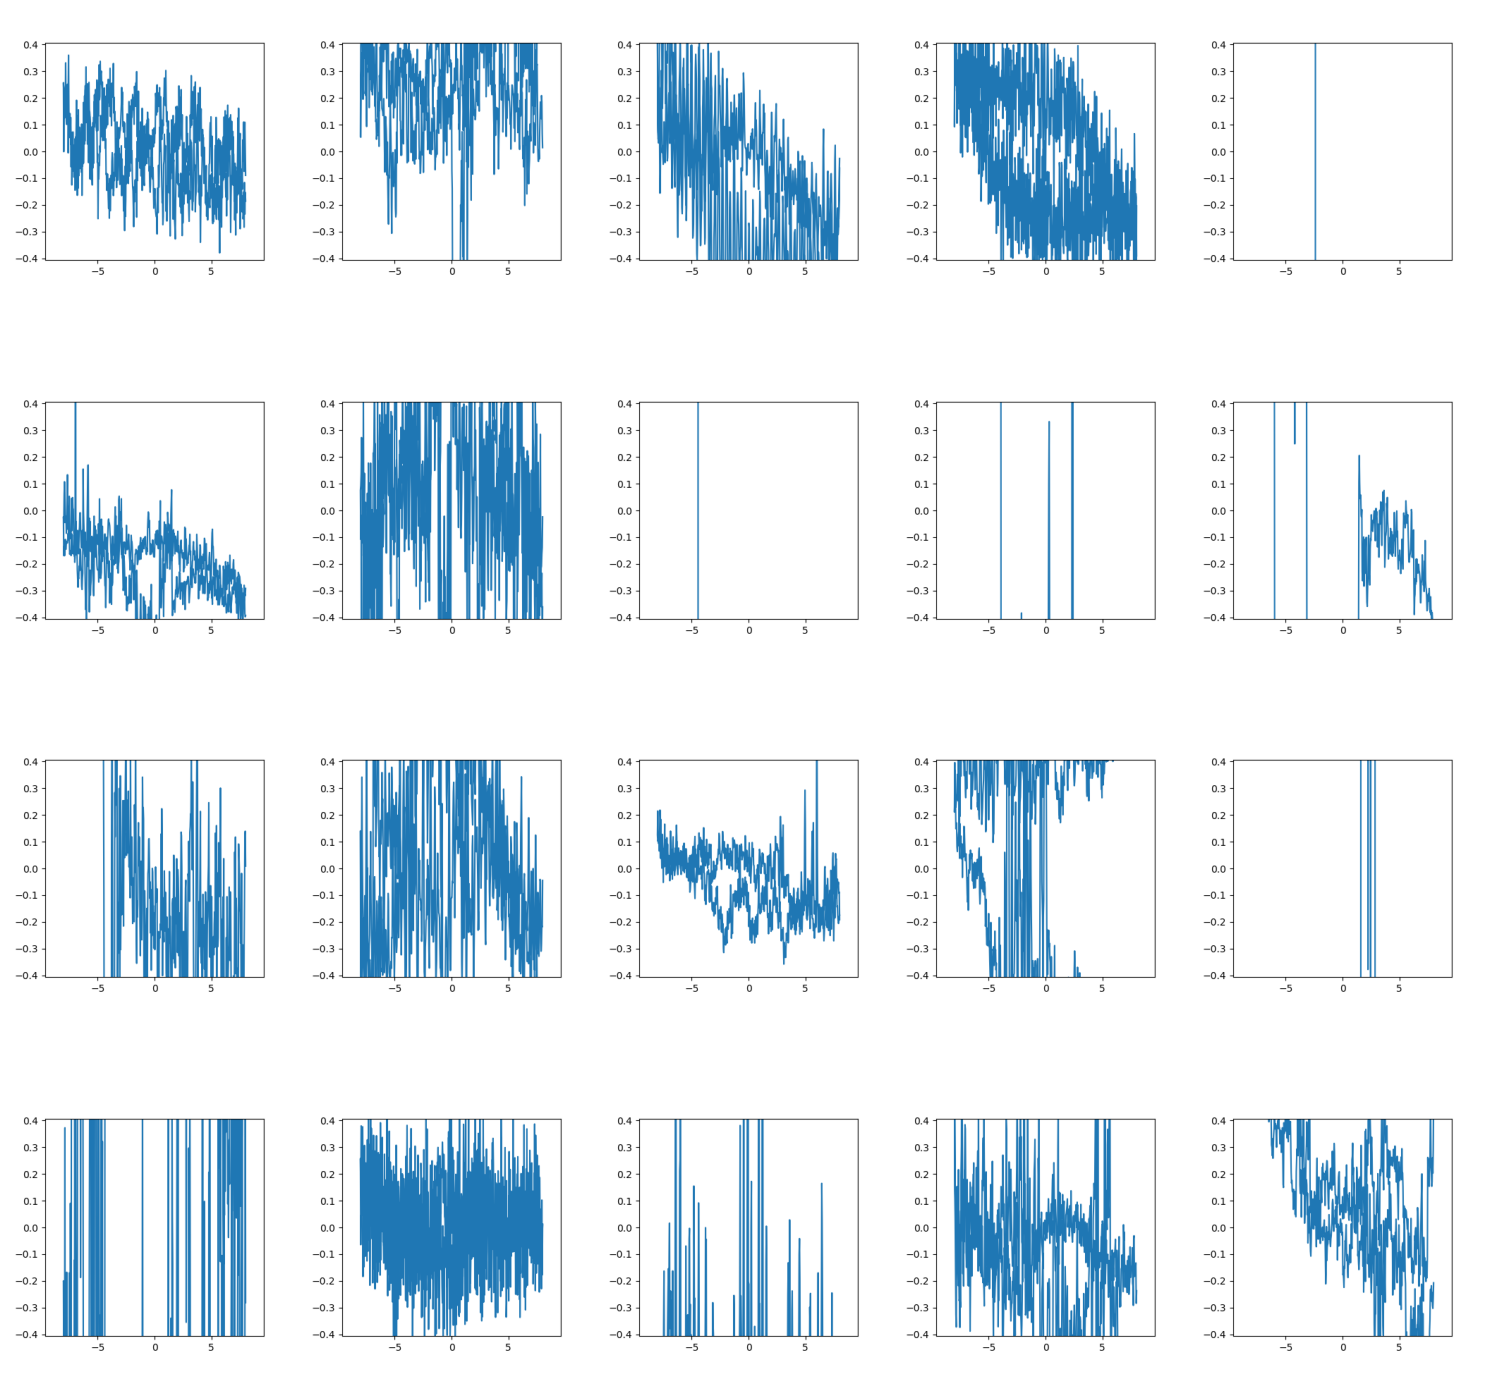

In [ ]:
# ランダムに20個のデータを取り出す
random_sample = df_to_classify.query('label == 0').sample(n=20)
display_images_in_grid(random_sample, 4, 5)  # 2行5列に配置して表示